In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt
import matplotlib.pyplot as plt

Problem 1

In [2]:
#Create LP model object
mymodel = glp.Solver('Spencer', glp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

In [10]:
inf = mymodel.infinity()

            # name: (type 'c'=continuous or 'i'=integer, lower bound, upper bound, objective coefficient)
variables = {'LWE': ('i',0 ,1 , 4),
             'EWE': ('i',0 ,1 , 6),
             'TMNP': ('i',0 ,1 , 10.5),
             'AC': ('i',0 ,1 , 4),
             'BR': ('i',0 ,1 , 8),
             'PNE': ('i',0 ,1 , 3),
            }

            # name: (lower bound, upper bound, coefficient list)
constraints = {'Y1': (-inf ,10.5 , [3 ,3.5 ,6 ,2, 5, 1 ]),
               'Y2': (-inf ,7 , [1 ,3.5 ,4 ,1.5,1, .5 ]),
               'Y3': (-inf ,8.75 , [4 ,3.5 ,5 ,1.8,4,.9 ]),
              }

mymodel.Objective().SetMaximization()

In [11]:
for v in variables:
    (t,lb,ub,c) = variables[v]
    if t == 'c':
        var = mymodel.NumVar(lb,ub,v)
    elif t == 'i':
        var = mymodel.IntVar(lb,ub,v)
    else:
        print('Invalid variable type =', t)
    mymodel.Objective().SetCoefficient(var,c)

In [12]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [13]:
lpt.print_model(mymodel)

Variables:
LWE, EWE, TMNP, AC, BR, PNE 

maximize: 4.0*LWE + 6.0*EWE + 10.5*TMNP + 4.0*AC + 8.0*BR + 3.0*PNE 

Subject To:
Y1: 3.0*LWE + 3.5*EWE + 6.0*TMNP + 2.0*AC + 5.0*BR + 1.0*PNE <= 10.5
Y2: 1.0*LWE + 3.5*EWE + 4.0*TMNP + 1.5*AC + 1.0*BR + 0.5*PNE <= 7.0
Y3: 4.0*LWE + 3.5*EWE + 5.0*TMNP + 1.8*AC + 4.0*BR + 0.9*PNE <= 8.75

Bounds:
LWE in [0, 1]
EWE in [0, 1]
TMNP in [0, 1]
AC in [0, 1]
BR in [0, 1]
PNE in [0, 1]


In [14]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 17.50
LWE = 0.00
EWE = 0.00
TMNP = 1.00
AC = 1.00
BR = 0.00
PNE = 1.00


In [15]:
# display variable information
print('Variable    LB   Value    UB')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f' % (v.name(),v.lb(),v.solution_value(),v.ub()))

Variable    LB   Value    UB
     LWE    0.0    0.0    1.0
     EWE    0.0    0.0    1.0
    TMNP    0.0    1.0    1.0
      AC    0.0    1.0    1.0
      BR    0.0    0.0    1.0
     PNE    0.0    1.0    1.0


In [16]:
#display constraint information
print('Constraint    LB    Value  UB')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f' % (c.name(),c.lb(),lhs,c.ub()))

Constraint    LB    Value  UB
        Y1   -inf    9.0   10.5
        Y2   -inf    6.0    7.0
        Y3   -inf    7.7    8.8


Part C

In [17]:
# cannot choose both the Test Market and the Advertising Campaign optionst

new_constr = mymodel.Constraint(-inf, 1, 'AtMostTM&AC')
new_constr.SetCoefficient(mymodel.variables()[2],1)
new_constr.SetCoefficient(mymodel.variables()[3],1)
lpt.print_model(mymodel)

Variables:
LWE, EWE, TMNP, AC, BR, PNE 

maximize: 4.0*LWE + 6.0*EWE + 10.5*TMNP + 4.0*AC + 8.0*BR + 3.0*PNE 

Subject To:
Y1: 3.0*LWE + 3.5*EWE + 6.0*TMNP + 2.0*AC + 5.0*BR + 1.0*PNE <= 10.5
Y2: 1.0*LWE + 3.5*EWE + 4.0*TMNP + 1.5*AC + 1.0*BR + 0.5*PNE <= 7.0
Y3: 4.0*LWE + 3.5*EWE + 5.0*TMNP + 1.8*AC + 4.0*BR + 0.9*PNE <= 8.75
AtMostTM&AC: 1.0*TMNP + 1.0*AC <= 1.0

Bounds:
LWE in [0, 1]
EWE in [0, 1]
TMNP in [0, 1]
AC in [0, 1]
BR in [0, 1]
PNE in [0, 1]


In [18]:
mymodel.Solve()
print(mymodel.Objective().Value())
for v in mymodel.variables():
    print(v.name(), v.solution_value())

17.0
LWE 0.0
EWE 1.0
TMNP 0.0
AC 0.0
BR 1.0
PNE 1.0


Problem 2

In [9]:
#Create MILP model object
mymodel = glp.Solver('Scott', glp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

In [10]:
inf = mymodel.infinity()

         # name: supply capacity (thousand tons), fixed cost (thousand $), unit shipping cost ($) to each RDC
source = {'Cle': (30,320 , [ 2, 6, 10]),    # Cleveland
          'Nash': (15,175 , [ 3, 4, 9]),    # Nashville
          'StL': (30,300 , [ 5, 9, 7]),    # St. Louis
          'Mil':  (25,0 , [5, 10, 8]),    # Milwaukee
         }
          
        # name: demand quantity required (thousand tons)
demand = {'Sct': 20, 'Atl': 10, 'Reno': 25,}    # Scranton Atlanta Reno

mymodel.Objective().SetMinimization()    # minimize total plant and transportation cost

In [11]:
# create binary Plant selection variables and a dictionary to access them
select = dict()
for s in source:
    select[s] = mymodel.IntVar(0,1,s)
    (b, f, coeff_lst ) = source[s]
    mymodel.Objective().SetCoefficient(select[s], f)
print(select)
lpt.print_model(mymodel)

{'Cle': Cle, 'Nash': Nash, 'StL': StL, 'Mil': Mil}
Variables:
Cle, Nash, StL, Mil 

minimize: 320.0*Cle + 175.0*Nash + 300.0*StL 

Subject To:

Bounds:
Cle in [0, 1]
Nash in [0, 1]
StL in [0, 1]
Mil in [0, 1]


In [6]:
# create shipment variables from Plants to RDCs and a dictionary to access them
ship = dict()
for s in source:
    ship[s] = dict()
    (b, f, coeff_lst) = source[s]
    for (d,c) in zip(demand,coeff_lst):
        ship[s][d] = mymodel.NumVar(0, inf, s + '.' + d)
        mymodel.Objective().SetCoefficient(ship[s][d] ,c )
print(ship)

{'Cle': {'Sct': Cle.Sct, 'Atl': Cle.Atl, 'Reno': Cle.Reno}, 'Nash': {'Sct': Nash.Sct, 'Atl': Nash.Atl, 'Reno': Nash.Reno}, 'StL': {'Sct': StL.Sct, 'Atl': StL.Atl, 'Reno': StL.Reno}, 'Mil': {'Sct': Mil.Sct, 'Atl': Mil.Atl, 'Reno': Mil.Reno}}


In [7]:
# create source/supply constraints
for s in source:
    (b, f, coeff_lst) = source[s]
    constr = mymodel.Constraint(-inf ,0 ,s )
    constr.SetCoefficient(select[s] , -b)
    for d in demand:
        constr.SetCoefficient(ship[s][d], 1)
print(source)

{'Cle': (30, 320, [2, 6, 10]), 'Nash': (15, 175, [3, 4, 9]), 'StL': (30, 300, [5, 9, 7]), 'Mil': (25, 0, [5, 10, 8])}


In [8]:
# create demand constraints
for d in demand:
    lb = ub = demand[d]
    constr = mymodel.Constraint(lb ,ub ,d )
    for s in source:
        constr.SetCoefficient(ship[s][d] , 1)
print(demand)

{'Sct': 20, 'Atl': 10, 'Reno': 25}


In [25]:
lpt.print_model(mymodel)

Variables:
Cle, Nash, StL, Mil, Cle.Sct, Cle.Atl, Cle.Reno, Nash.Sct, Nash.Atl, Nash.Reno, StL.Sct, StL.Atl, StL.Reno, Mil.Sct, Mil.Atl, Mil.Reno 

minimize: 320.0*Cle + 175.0*Nash + 300.0*StL + 2.0*Cle.Sct + 6.0*Cle.Atl + 10.0*Cle.Reno + 3.0*Nash.Sct + 4.0*Nash.Atl + 9.0*Nash.Reno + 5.0*StL.Sct + 9.0*StL.Atl + 7.0*StL.Reno + 5.0*Mil.Sct + 10.0*Mil.Atl + 8.0*Mil.Reno 

Subject To:
Cle: - 30.0*Cle + 1.0*Cle.Sct + 1.0*Cle.Atl + 1.0*Cle.Reno <= 0.0
Nash: - 15.0*Nash + 1.0*Nash.Sct + 1.0*Nash.Atl + 1.0*Nash.Reno <= 0.0
StL: - 30.0*StL + 1.0*StL.Sct + 1.0*StL.Atl + 1.0*StL.Reno <= 0.0
Mil: - 25.0*Mil + 1.0*Mil.Sct + 1.0*Mil.Atl + 1.0*Mil.Reno <= 0.0
Sct: 1.0*Cle.Sct + 1.0*Nash.Sct + 1.0*StL.Sct + 1.0*Mil.Sct = 20.0
Atl: 1.0*Cle.Atl + 1.0*Nash.Atl + 1.0*StL.Atl + 1.0*Mil.Atl = 10.0
Reno: 1.0*Cle.Reno + 1.0*Nash.Reno + 1.0*StL.Reno + 1.0*Mil.Reno = 25.0

Bounds:
Cle in [0, 1]
Nash in [0, 1]
StL in [0, 1]
Mil in [0, 1]
Cle.Sct >= 0.0
Cle.Atl >= 0.0
Cle.Reno >= 0.0
Nash.Sct >= 0.0
Nash.Atl >= 0

In [26]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f thousand' % mymodel.Objective().Value())
for v in mymodel.variables():
    if v.solution_value() != 0:
        print('%7s = %5.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 620.00 thousand
    Cle =  1.00
    Mil =  1.00
Cle.Sct = 20.00
Cle.Atl = 10.00
Mil.Reno = 25.00


In [27]:
import matplotlib.pyplot as plt

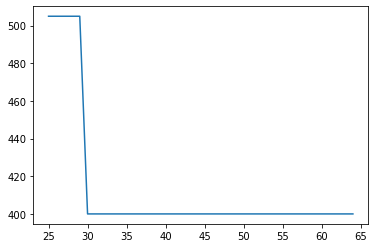

In [28]:
# increasing the capacity of the Milwaukee factory

param_lst = list(range(25,65))
optval_lst = list()

for b in param_lst:
    mymodel.constraints()[3].SetUb(b)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
mymodel.constraints()[2].SetUb(25)

plt.plot(param_lst,optval_lst)

Sharp drop in cost if capacity of Mil is increased to 30k